In [2]:
import adddeps
from pltconf import *
from utils.utils import standartize
import numpy as np
from scipy.stats import norm,normaltest, probplot

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import pandas as pd
import sys, os
import pickle

In [3]:
with open("CSdata.pkl", "rb") as f:
    procs = pickle.load(f)

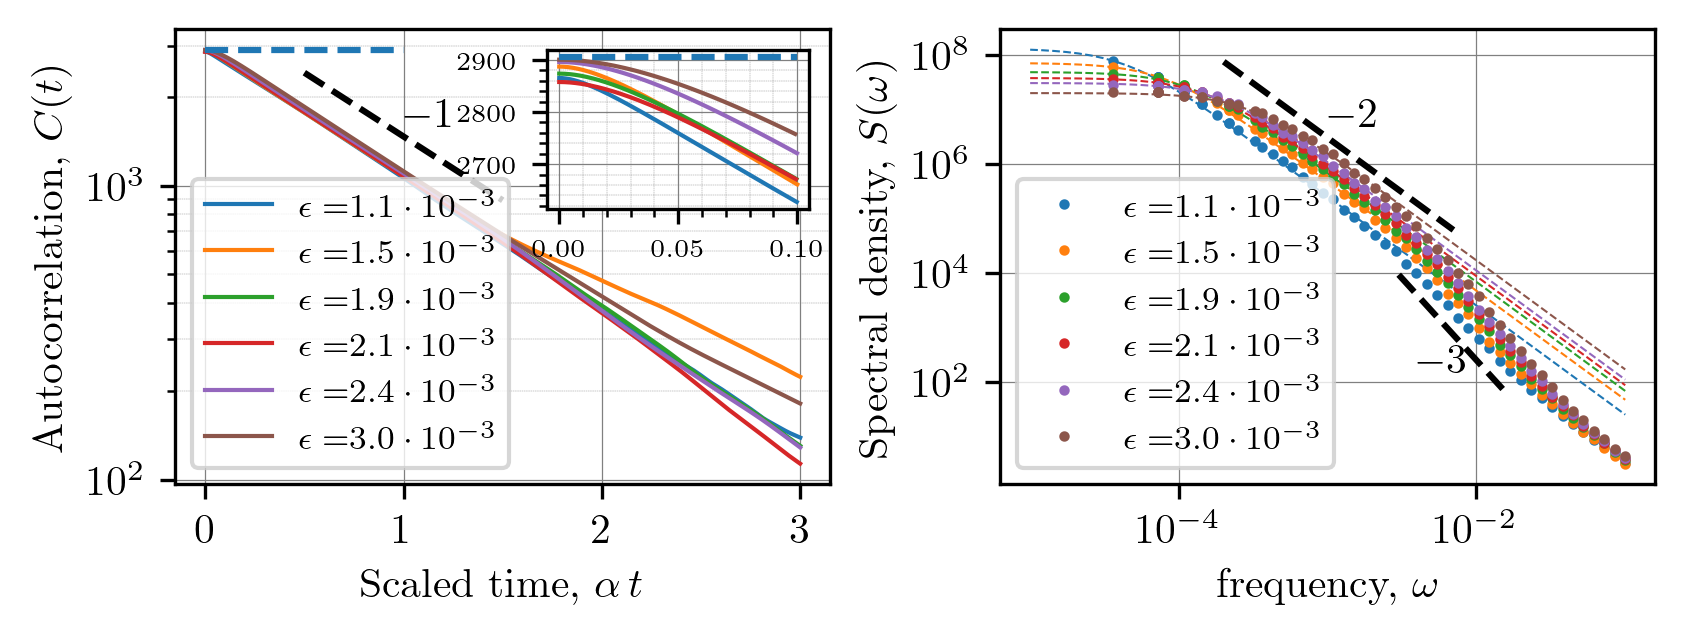

In [4]:
fig = plt.figure(constrained_layout=True, 
                #  figsize=(7,2.7) # paper
                 figsize=(5.5,2) # slide
                #  linewidth=10, edgecolor="#04253a"
                 )
spec5 = fig.add_gridspec(ncols=2, nrows=1, hspace=0.1)
#################################################

ax = fig.add_subplot(spec5[0, 0])


for proc in procs:
    eps = proc["eps"]
    label = r"$\epsilon=$"+ f"${eps*1e3:0.1f}"+r"\cdot 10^{-3}$"
    df = proc["C"]
    df = df[df["t1"]<3]
    ax.plot(df["t1"], df["C"], lw=1, label=label)


ax.legend(fontsize=8,loc='lower left')

ax.set_yscale("log")

ts = np.array([0.5,1.5])
ax.plot(ts, 4e3*np.exp(-ts), "--", color="black")
ax.text(1,1.6e3, '$-1$')

ax.hlines(y=2905.552, xmin=0, xmax=1, ls="--")

ax.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')

ax.set_xlabel(r"Scaled time, $\alpha\,t$")
ax.set_ylabel("Autocorrelation, $C(t)$")

### inset
inset_ax = inset_axes(ax, width="40%", height="35%", loc="upper right")
for proc in procs:
    df = proc["C"]
    df = df[df["t1"]<0.1]
    inset_ax.plot(df["t1"], df["C"], lw=1)
inset_ax.tick_params(axis='both', which='major', labelsize=6)
inset_ax.minorticks_on()
inset_ax.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
inset_ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')
inset_ax.hlines(y=2905.552, xmin=0, xmax=0.1, ls="--")

# inset_ax.set_yscale("log")
#######

#################################################
ax = fig.add_subplot(spec5[0, 1])

i=0
for proc, c in zip(procs, colors):
    alpha = proc["alpha"]
    df =  proc["spectr"].loc[:0.1].iloc[1:]
    eps = proc["eps"]
    label = r"$\epsilon=$"+f"${eps*1e3:0.1f}"+r"\cdot 10^{-3}$"

    
    omegas = np.logspace(np.log10(1e-5), np.log10(df.index[-1]))
    
    ax.plot(omegas, proc["C"].iloc[0]["C"] * 2* alpha / (alpha**2 + omegas**2),
             color=c, lw=0.5, ls="--")
    
    omega_target = np.logspace(np.log10(df.index[0]), np.log10(df.index[-1]), 50+i)
    ids = np.searchsorted(df.index+1e-7, omega_target)
    df = df.iloc[ids]
    
    plt.plot(df.index, df["S"], lw=0, marker=".",ms=3,color=c,  label=label)
    
omegas = np.array([2e-4,7e-3])
plt.plot(omegas, 3e-0 * omegas ** (-2), "--", color="black")
ax.text(1e-3,0.5e7, '$-2$')


omegas = np.array([3e-3,15e-3])
plt.plot(omegas, 2.5e-4 * omegas ** (-3), "--", color="black",)
ax.text(4e-3,1.5e2, '$-3$')

ax.minorticks_on()

ax.grid(which='major', linestyle='-', linewidth='0.3', color='gray')
ax.grid(which='minor', linestyle='--', linewidth='0.1', color='gray')
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("frequency, $\omega$")
ax.set_ylabel("Spectral density, $S(\omega)$")
ax.legend(fontsize=8,loc='lower left')

plt.savefig("CS.pdf", bbox_inches="tight")

In [10]:
procs[0]

{'gamma': 0.004095929728126548,
 'alpha': 4.37662386630128e-05,
 'eps': 0.0010584872377071154,
 'e': 0.065,
 'spectr':                      S
 omega                 
 0.000000  1.132766e+08
 0.000036  7.788084e+07
 0.000072  3.980505e+07
 0.000108  2.041349e+07
 0.000144  1.255656e+07
 ...                ...
 1.256493  7.877940e+06
 1.256529  1.255656e+07
 1.256565  2.041349e+07
 1.256601  3.980505e+07
 1.256637  7.788084e+07
 
 [35001 rows x 1 columns],
 'C':                  t            C        t1
 t                                        
 0.0            0.0  2865.401531  0.000000
 5.0            5.0  2865.391427  0.000219
 10.0          10.0  2865.372254  0.000438
 15.0          15.0  2865.346904  0.000656
 20.0          20.0  2865.301327  0.000875
 ...            ...          ...       ...
 174980.0  174980.0   125.647830  7.658216
 174985.0  174985.0   125.420936  7.658435
 174990.0  174990.0   125.179004  7.658654
 174995.0  174995.0   124.951388  7.658873
 175000.0  175000.0 